## Import the raw data

This workbook imports the weekly transaction files, concatenates them into one large file for analysis and run some simple EDA

### Set code parameters and import libraries

In [1]:
import pandas as pd
import boto3
import os
import sys
from sagemaker import get_execution_role

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from Grocery_Recommender.Import_Data.import_data import *

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [3]:
role = get_execution_role()
region = boto3.Session().region_name
bucket = "udacity-machine-learning-capstone-data"

### Import the data

In [4]:
# Import all customer transaction data and the calendar data
time_data, all_trans = import_data(bucket)

Importing data for udacity_capstone_data/time.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/time.csv
udacity_capstone_data/time.csv
Importing data for udacity_capstone_data/transactions_200607.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200607.csv
udacity_capstone_data/transactions_200607.csv
Importing data for udacity_capstone_data/transactions_200608.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200608.csv
udacity_capstone_data/transactions_200608.csv
Importing data for udacity_capstone_data/transactions_200609.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200609.csv
udacity_capstone_data/transactions_200609.csv
Importing data for udacity_capstone_data/transactions_200610.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200610.csv
udacity_capstone_data/transactions_200610.csv
Importing data for udacity_capstone_data

Importing data for udacity_capstone_data/transactions_200647.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200647.csv
udacity_capstone_data/transactions_200647.csv
Importing data for udacity_capstone_data/transactions_200648.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200648.csv
udacity_capstone_data/transactions_200648.csv
Importing data for udacity_capstone_data/transactions_200649.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200649.csv
udacity_capstone_data/transactions_200649.csv
Importing data for udacity_capstone_data/transactions_200650.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200650.csv
udacity_capstone_data/transactions_200650.csv
Importing data for udacity_capstone_data/transactions_200651.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200651.csv
udacity_capstone_data/transactions_200651

Importing data for udacity_capstone_data/transactions_200736.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200736.csv
udacity_capstone_data/transactions_200736.csv
Importing data for udacity_capstone_data/transactions_200737.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200737.csv
udacity_capstone_data/transactions_200737.csv
Importing data for udacity_capstone_data/transactions_200738.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200738.csv
udacity_capstone_data/transactions_200738.csv
Importing data for udacity_capstone_data/transactions_200739.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200739.csv
udacity_capstone_data/transactions_200739.csv
Importing data for udacity_capstone_data/transactions_200740.csv
s3://udacity-machine-learning-capstone-data/udacity_capstone_data/transactions_200740.csv
udacity_capstone_data/transactions_200740

### EDA raw transaction files

In [5]:
all_trans.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200607,20060415,7,19,1,0.93,PRD0900033,CL00201,DEP00067,G00021,D00005,CUST0000410727,UM,OT,994100100398294,L,MM,Full Shop,Mixed,STORE00001,LS,E02
1,200607,20060413,5,20,1,1.03,PRD0900097,CL00001,DEP00001,G00001,D00001,CUST0000634693,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
2,200607,20060416,1,14,1,0.98,PRD0900121,CL00063,DEP00019,G00007,D00002,NaN,NaN,NaN,994100100135562,L,MM,Top Up,Grocery,STORE00001,LS,E02
3,200607,20060415,7,19,1,3.07,PRD0900135,CL00201,DEP00067,G00021,D00005,CUST0000410727,UM,OT,994100100398294,L,MM,Full Shop,Mixed,STORE00001,LS,E02
4,200607,20060415,7,19,1,4.81,PRD0900220,CL00051,DEP00013,G00005,D00002,CUST0000410727,UM,OT,994100100398294,L,MM,Full Shop,Mixed,STORE00001,LS,E02


In [6]:
all_trans.describe()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,BASKET_ID
count,3.158469e+06,3.158469e+06,3.158469e+06,3.158469e+06,3.158469e+06,3.158469e+06,3.158469e+06
mean,2.007019e+05,2.006968e+07,3.995699e+00,1.499305e+01,1.503747e+00,1.910266e+00,9.941059e+14
std,6.633683e+01,7.210264e+03,1.996956e+00,3.679253e+00,1.819364e+00,3.413940e+00,3.374392e+09
min,2.006070e+05,2.006041e+07,1.000000e+00,8.000000e+00,1.000000e+00,0.000000e+00,9.941001e+14
25%,2.006360e+05,2.006103e+07,2.000000e+00,1.200000e+01,1.000000e+00,7.700000e-01,9.941030e+14
50%,2.007130e+05,2.007052e+07,4.000000e+00,1.500000e+01,1.000000e+00,1.230000e+00,9.941059e+14
75%,2.007420e+05,2.007121e+07,6.000000e+00,1.800000e+01,1.000000e+00,2.090000e+00,9.941088e+14
max,2.008190e+05,2.008071e+07,7.000000e+00,2.200000e+01,1.685000e+03,2.594900e+03,9.941117e+14


In [7]:
# Note that there are some potential outlier values in spend and quantity

In [8]:
# Any missing data in the transaction table?
all_trans.isnull().sum()

SHOP_WEEK                        0
SHOP_DATE                        0
SHOP_WEEKDAY                     0
SHOP_HOUR                        0
QUANTITY                         0
SPEND                            0
PROD_CODE                        0
PROD_CODE_10                     0
PROD_CODE_20                     0
PROD_CODE_30                     0
PROD_CODE_40                     0
CUST_CODE                   617450
CUST_PRICE_SENSITIVITY      617450
CUST_LIFESTAGE              924940
BASKET_ID                        0
BASKET_SIZE                      0
BASKET_PRICE_SENSITIVITY         0
BASKET_TYPE                      0
BASKET_DOMINANT_MISSION          0
STORE_CODE                       0
STORE_FORMAT                     0
STORE_REGION                     0
dtype: int64

In [9]:
# Note missing data in CUST_CODE, CUST_PRICE_SENSITIVITY and CUST_LIFESTAGE

In [10]:
# Get counts of SHOP_WEEK, SHOP_DATE, SHOP_WEEKDAY and SHOP_HOUR
time_vars = all_trans[["SHOP_WEEK", "SHOP_DATE", "SHOP_WEEKDAY", "SHOP_HOUR"]]
time_vars.apply(pd.Series.value_counts)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR
1,NaN,NaN,449301.0,NaN
2,NaN,NaN,455061.0,NaN
3,NaN,NaN,451659.0,NaN
4,NaN,NaN,451725.0,NaN
5,NaN,NaN,451862.0,NaN
6,NaN,NaN,452345.0,NaN
7,NaN,NaN,446516.0,NaN
8,NaN,NaN,NaN,132893.0
9,NaN,NaN,NaN,107497.0
10,NaN,NaN,NaN,153989.0


In [11]:
# Get counts of CUST_PRICE_SENSITIVITY, CUST_LIFESTAGE
cust_vars = all_trans[["CUST_PRICE_SENSITIVITY", "CUST_LIFESTAGE"]]
cust_vars.apply(pd.Series.value_counts)

,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE
LA,677644.0,NaN
MM,1155548.0,NaN
OA,NaN,310818.0
OF,NaN,132850.0
OT,NaN,763594.0
PE,NaN,171392.0
UM,704401.0,NaN
XX,3426.0,NaN
YA,NaN,332887.0
YF,NaN,521988.0


In [12]:
# Get counts of BASKET_SIZE, BASKET_PRICE_SENSITIVITY, BASKET_TYPE and BASKET_DOMINANT_MISSION
basket_vars = all_trans[
    [
        "BASKET_SIZE",
        "BASKET_PRICE_SENSITIVITY",
        "BASKET_TYPE",
        "BASKET_DOMINANT_MISSION",
    ]
]
basket_vars.apply(pd.Series.value_counts)

,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION
Fresh,NaN,NaN,NaN,1594629.0
Full Shop,NaN,NaN,1100070.0,NaN
Grocery,NaN,NaN,NaN,327759.0
L,2208839.0,NaN,NaN,NaN
LA,NaN,729679.0,NaN,NaN
M,766716.0,NaN,NaN,NaN
MM,NaN,1645152.0,NaN,NaN
Mixed,NaN,NaN,NaN,1179292.0
Nonfood,NaN,NaN,NaN,50198.0
S,182914.0,NaN,NaN,NaN


In [13]:
# Get counts of STORE_FORMAT and STORE_REGION
store_vars = all_trans[["STORE_FORMAT", "STORE_REGION"]]
store_vars.apply(pd.Series.value_counts)

,STORE_FORMAT,STORE_REGION
E01,NaN,242117.0
E02,NaN,231554.0
E03,NaN,231633.0
LS,2010207.0,NaN
MS,682085.0,NaN
N01,NaN,308559.0
N02,NaN,267923.0
N03,NaN,290429.0
S01,NaN,231171.0
S02,NaN,319584.0


In [14]:
# Get counts of product codes
prod_vars = all_trans[["PROD_CODE_10", "PROD_CODE_20", "PROD_CODE_30", "PROD_CODE_40"]]
prod_vars.apply(pd.Series.value_counts)

,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40
CL00001,43881.0,NaN,NaN,NaN
CL00002,35285.0,NaN,NaN,NaN
CL00003,18170.0,NaN,NaN,NaN
CL00004,3032.0,NaN,NaN,NaN
CL00005,6661.0,NaN,NaN,NaN
CL00006,30673.0,NaN,NaN,NaN
CL00007,21350.0,NaN,NaN,NaN
CL00008,9254.0,NaN,NaN,NaN
CL00009,1861.0,NaN,NaN,NaN
CL00010,12189.0,NaN,NaN,NaN


In [15]:
# Number of distinct customers
all_trans["CUST_CODE"].nunique()

5000

In [16]:
# Number of distinct items
all_trans["PROD_CODE"].nunique()

4997

In [17]:
# Number of unique stores
all_trans

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200607,20060415,7,19,1,0.93,PRD0900033,CL00201,DEP00067,G00021,D00005,CUST0000410727,UM,OT,994100100398294,L,MM,Full Shop,Mixed,STORE00001,LS,E02
1,200607,20060413,5,20,1,1.03,PRD0900097,CL00001,DEP00001,G00001,D00001,CUST0000634693,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
2,200607,20060416,1,14,1,0.98,PRD0900121,CL00063,DEP00019,G00007,D00002,NaN,NaN,NaN,994100100135562,L,MM,Top Up,Grocery,STORE00001,LS,E02
3,200607,20060415,7,19,1,3.07,PRD0900135,CL00201,DEP00067,G00021,D00005,CUST0000410727,UM,OT,994100100398294,L,MM,Full Shop,Mixed,STORE00001,LS,E02
4,200607,20060415,7,19,1,4.81,PRD0900220,CL00051,DEP00013,G00005,D00002,CUST0000410727,UM,OT,994100100398294,L,MM,Full Shop,Mixed,STORE00001,LS,E02
5,200607,20060412,4,19,1,0.28,PRD0900353,CL00070,DEP00020,G00007,D00002,CUST0000634693,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
6,200607,20060413,5,18,1,1.56,PRD0900547,CL00076,DEP00022,G00007,D00002,NaN,NaN,NaN,994100100136577,M,LA,Small Shop,Fresh,STORE00001,LS,E02
7,200607,20060413,5,20,3,0.84,PRD0900550,CL00167,DEP00055,G00016,D00003,CUST0000634693,LA,YF,994100100532898,L,LA,Top Up,Fresh,STORE00001,LS,E02
8,200607,20060413,5,18,1,1.09,PRD0900614,CL00162,DEP00055,G00016,D00003,NaN,NaN,NaN,994100100136577,M,LA,Small Shop,Fresh,STORE00001,LS,E02
9,200607,20060415,7,19,1,1.62,PRD0900709,CL00205,DEP00069,G00022,D00005,CUST0000410727,UM,OT,994100100398294,L,MM,Full Shop,Mixed,STORE00001,LS,E02


In [18]:
all_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158469 entries, 0 to 28174
Data columns (total 22 columns):
SHOP_WEEK                   int64
SHOP_DATE                   int64
SHOP_WEEKDAY                int64
SHOP_HOUR                   int64
QUANTITY                    int64
SPEND                       float64
PROD_CODE                   object
PROD_CODE_10                object
PROD_CODE_20                object
PROD_CODE_30                object
PROD_CODE_40                object
CUST_CODE                   object
CUST_PRICE_SENSITIVITY      object
CUST_LIFESTAGE              object
BASKET_ID                   int64
BASKET_SIZE                 object
BASKET_PRICE_SENSITIVITY    object
BASKET_TYPE                 object
BASKET_DOMINANT_MISSION     object
STORE_CODE                  object
STORE_FORMAT                object
STORE_REGION                object
dtypes: float64(1), int64(6), object(15)
memory usage: 554.2+ MB


In [19]:
time_data.head()

,shop_week,date_from,date_to
0,200607,20060410,20060416
1,200608,20060417,20060423
2,200609,20060424,20060430
3,200610,20060501,20060507
4,200611,20060508,20060514


In [20]:
time_data.describe()

,shop_week,date_from,date_to
count,142.000000,1.420000e+02,1.420000e+02
mean,200724.823944,2.007162e+07,2.007170e+07
std,78.317167,7.838950e+03,7.870682e+03
min,200607.000000,2.006041e+07,2.006042e+07
25%,200642.250000,2.006121e+07,2.006122e+07
50%,200725.500000,2.007082e+07,2.007082e+07
75%,200808.750000,2.008042e+07,2.008043e+07
max,200844.000000,2.008122e+07,2.008123e+07


In [21]:
time_data.isnull().sum()

shop_week    0
date_from    0
date_to      0
dtype: int64

In [22]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
shop_week    142 non-null int64
date_from    142 non-null int64
date_to      142 non-null int64
dtypes: int64(3)
memory usage: 3.4 KB


### Create EDA Plots

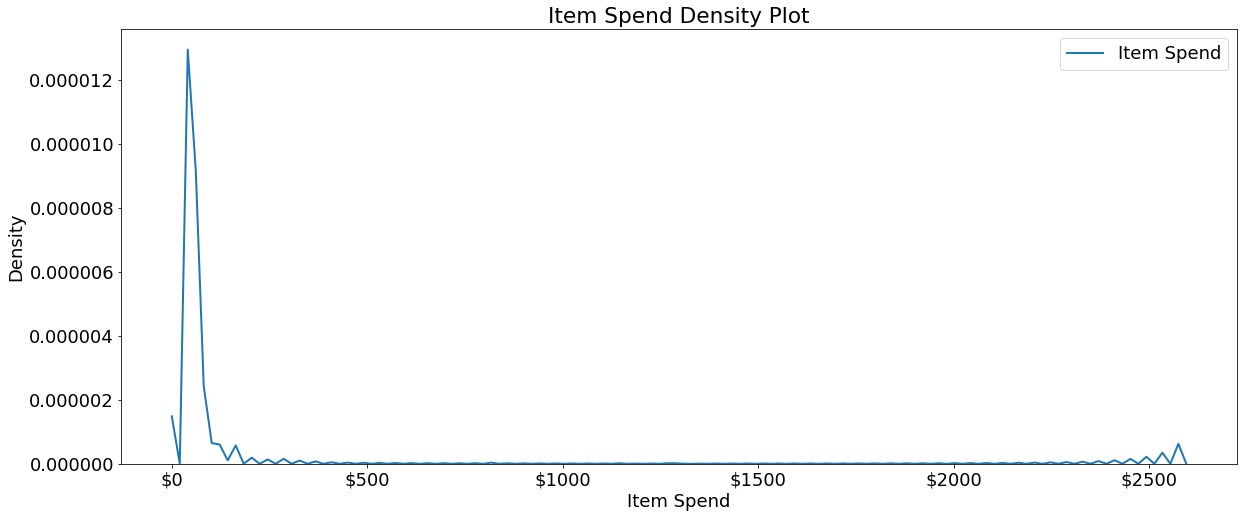

In [23]:
# Density plot of the item spend
plt.figure(figsize=(20, 8))
plt.rcParams["font.size"] = 18

sns.kdeplot(all_trans["SPEND"], label="Item Spend", linewidth=2)
plt.xlabel("Item Spend")
plt.ylabel("Density")
plt.title("Item Spend Density Plot")

formatter = ticker.FormatStrFormatter('$%1.0f')
plt.gca().xaxis.set_major_formatter(formatter)


Text(0.5, 1.0, 'Item Quantity Density Plot')

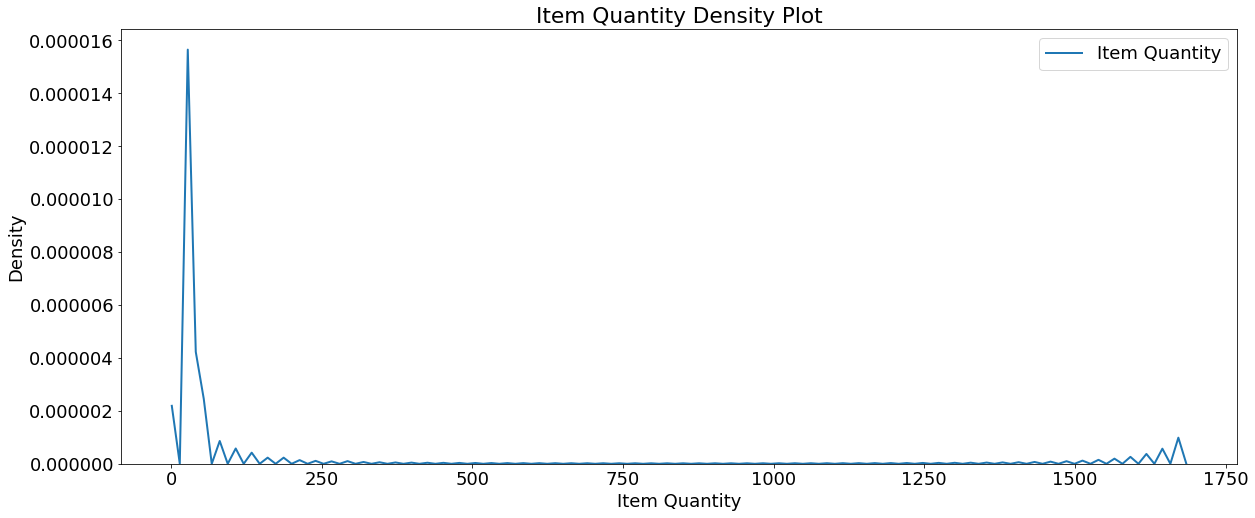

In [24]:
# Density plot of the item quantity
plt.figure(figsize=(20, 8))
plt.rcParams["font.size"] = 18

sns.kdeplot(all_trans["QUANTITY"], label="Item Quantity", linewidth=2)
plt.xlabel("Item Quantity")
plt.ylabel("Density")
plt.title("Item Quantity Density Plot")

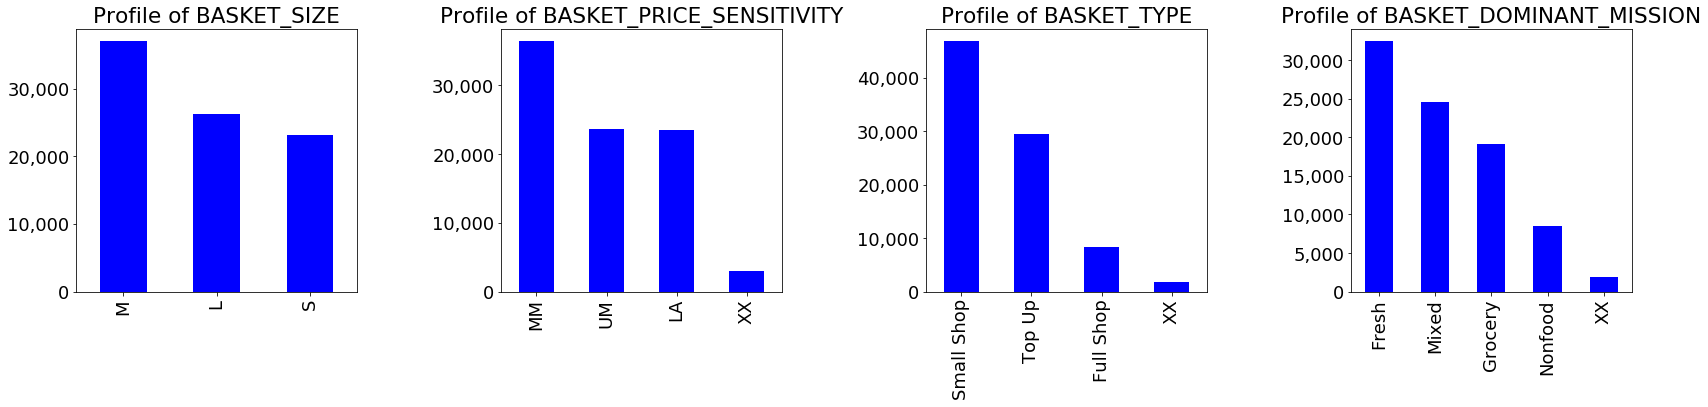

In [25]:
bask_segments = all_trans.loc[
    :,
    [
        "CUST_CODE",
        "BASKET_SIZE",
        "BASKET_PRICE_SENSITIVITY",
        "BASKET_TYPE",
        "BASKET_DOMINANT_MISSION",
    ],
].drop_duplicates()


fig, axs = plt.subplots(1, 4, figsize=(24, 6))
i = 0

# Plot of four hyperparameters
for i, var in enumerate(
    [
        "BASKET_SIZE",
        "BASKET_PRICE_SENSITIVITY",
        "BASKET_TYPE",
        "BASKET_DOMINANT_MISSION",
    ]
):
    bask_segments[var].value_counts().plot.bar(
        color="blue", title="Profile of {}".format(var), ax=axs[i]
    )
    axs[i].get_yaxis().set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x), ","))
    )

plt.tight_layout()

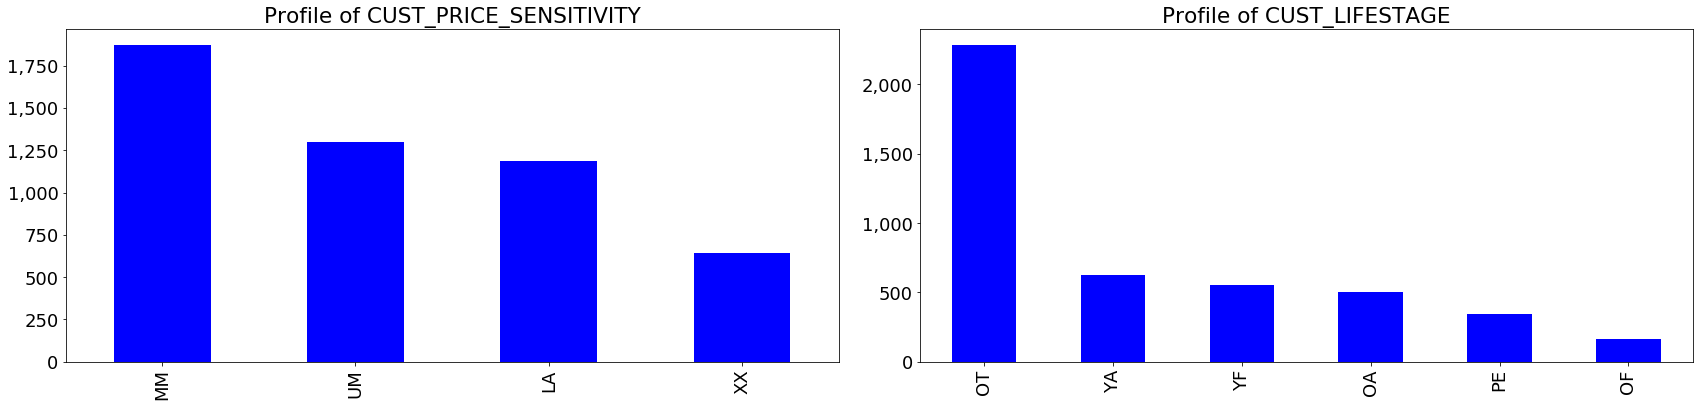

In [26]:
cust_segments = all_trans.loc[
    :, ["CUST_CODE", "CUST_PRICE_SENSITIVITY", "CUST_LIFESTAGE"]
].drop_duplicates()

fig, axs = plt.subplots(1, 2, figsize=(24, 6))
i = 0

# Plot of four hyperparameters
for i, var in enumerate(["CUST_PRICE_SENSITIVITY", "CUST_LIFESTAGE"]):
    cust_segments[var].value_counts().plot.bar(
        color="blue", title="Profile of {}".format(var), ax=axs[i]
    )
    axs[i].get_yaxis().set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x), ","))
    )

plt.tight_layout()

### Pickle DataFrames and upload to s3

In [27]:
# Transactions
all_trans.to_pickle("./all_trans.pkl")
key = "udacity_capstone_data/all_trans.pkl"
boto3.Session().resource("s3").Bucket(bucket).Object(key).upload_file("./all_trans.pkl")

In [28]:
# Calendar
time_data.to_pickle("./time_data.pkl")
key = "udacity_capstone_data/time_data.pkl"
boto3.Session().resource("s3").Bucket(bucket).Object(key).upload_file("./time_data.pkl")